## Additional Prep Work TODOs

* Add select categorical variables (being prepared by team)

## Working with the Models

Inputs:
* SOLDPRICE - float
* DOM - int
* BEDS - int
* BATHS - float
* SQFT - int
* AGE - int
* GARAGE - int

Out:
* FLIPPABLE - bool

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
import joblib
from imblearn.over_sampling import SMOTE

In [122]:
df = pd.read_csv('./outputs/merged_test_and_control_data.csv') 

In [123]:
df.shape

(133375, 10)

In [124]:
df.head()

,Unnamed: 0,FLIPPABLE,MLSNUM,SOLDPRICE,DOM,BEDS,BATHS,SQFT,AGE,GARAGE
0,0,True,71425748,50000.0,1077,4,2.0,1984,95,0
1,1,True,71477127,125000.0,724,4,2.0,2333,67,0
2,2,True,71478495,720500.0,828,4,3.5,4196,20,3
3,3,True,71485790,160000.0,1140,3,1.5,1350,58,0
4,4,True,71614526,335000.0,809,3,2.0,1270,38,1


In [125]:
df = df.drop(df.columns[0],axis=1)

In [126]:
# mix it up randomly
df = df.sample(frac=1)

In [127]:
df.head()

,FLIPPABLE,MLSNUM,SOLDPRICE,DOM,BEDS,BATHS,SQFT,AGE,GARAGE
60341,False,71822191,294816.0,1,9,3.0,3441,113,0
29797,False,72084885,365000.0,119,4,2.5,2500,17,2
47968,False,72123730,430000.0,41,3,3.0,2380,20,0
83073,False,72231838,205500.0,59,3,1.5,1037,40,0
69528,False,72109273,280000.0,17,3,2.0,1260,268,4


In [128]:
df.SOLDPRICE.describe()

count    1.333750e+05
mean     4.562606e+05
std      4.390886e+05
min      1.000000e+00
25%      2.500000e+05
50%      3.640000e+05
75%      5.300000e+05
max      4.550000e+07
Name: SOLDPRICE, dtype: float64

# Learning About Our Data

Ok, everything is loaded in, let's play!

First: this is a classification problem, we are classifying houses as FLIPPABLE 0 or 1. I want to see which of our continuous predictors affect whether a house is flippable or not, as well as see any relationships between the predictors themselves. Scatter matrix is helpful with that.

In [129]:
# Define label and features
y_names = ['FLIPPABLE']
x_names = ['SOLDPRICE', 'DOM', 'BEDS', 'BATHS', 'SQFT', 'AGE', 'GARAGE']

y = df[y_names]
x = df[x_names]

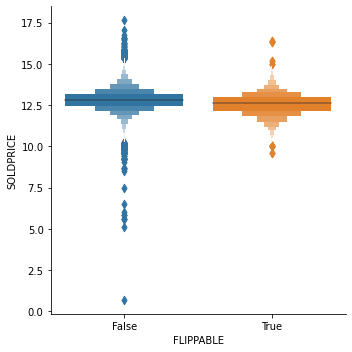

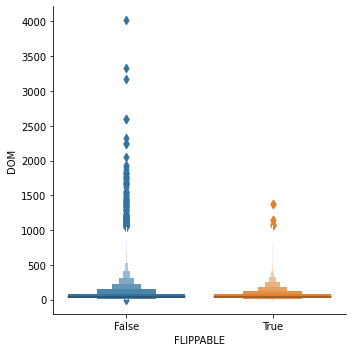

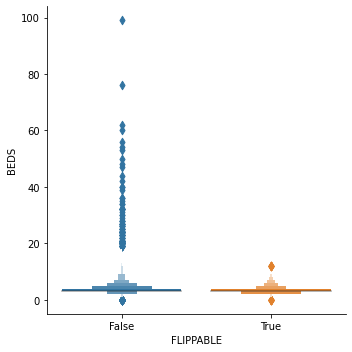

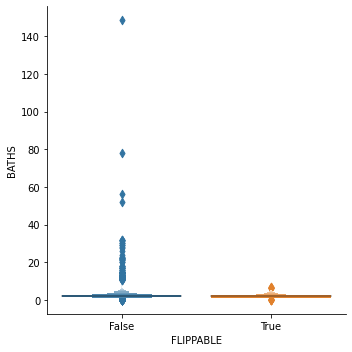

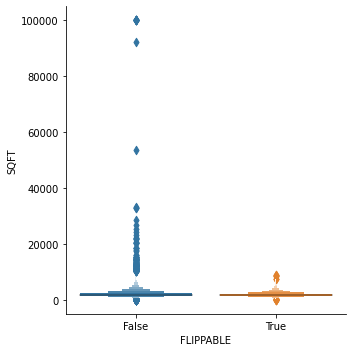

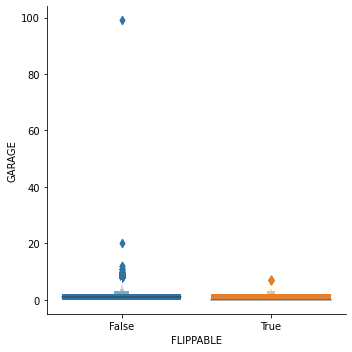

In [31]:
# Make boxplots so we can see the shape of our data a bit better, and catch outliers
# https://seaborn.pydata.org/tutorial/categorical.html

for i in range(0, len(x_names)):
    sns.catplot(x="FLIPPABLE", y=x_names[i], kind="boxen", data=df);

In [371]:
# Looks like we are getting some negative values with age. We'll clean this up in the next version (leaving that for team members)
df.loc[df['AGE'] < 0]

,FLIPPABLE,MLSNUM,SOLDPRICE,DOM,BEDS,BATHS,SQFT,AGE,GARAGE
420,True,71947648,608273.0,41,3,2.5,2086,-68,2
3550,True,71947648,608273.0,41,3,2.5,2086,-68,2
10411,False,72191043,810000.0,22,5,3.0,4000,-7981,0
10852,False,72029110,99000.0,3,4,2.0,2190,-172,0
13605,False,71920084,150000.0,52,3,2.0,1305,-7981,1
15298,False,71980474,185000.0,134,3,2.0,1280,-7981,1
21722,False,72003822,389000.0,84,3,2.5,2321,-6478,2
22864,False,72110860,2900000.0,193,6,3.5,3469,-7981,0
25740,False,72179044,564000.0,66,4,2.5,2430,-7981,1
40441,False,72205606,559000.0,80,4,2.5,2520,-7981,2


In [372]:
# it also seems like year built may be getting entered for age, since we are getting values over 2000...

df['AGE'].max()

2010

## PCA

PCA can tell us a lot about which predictors correlate most strongly with our outcome. Let's look at two components and then break them down to see which predictors are strongest.

We see at the bottom that SOLDPRICE and SQFT are the strongest (conceptally makes sense - we expect fixer uppers to have a lower price per square foot). We also see lots of outliers in our data.

The biggest challenge here is that there's really not a clear deliniation of the data (at least in the untransformed state), so our flippable houses are essentially a subset of the unflippable data. We see the same pattern in the scatter matrix below.

<Figure size 432x288 with 0 Axes>

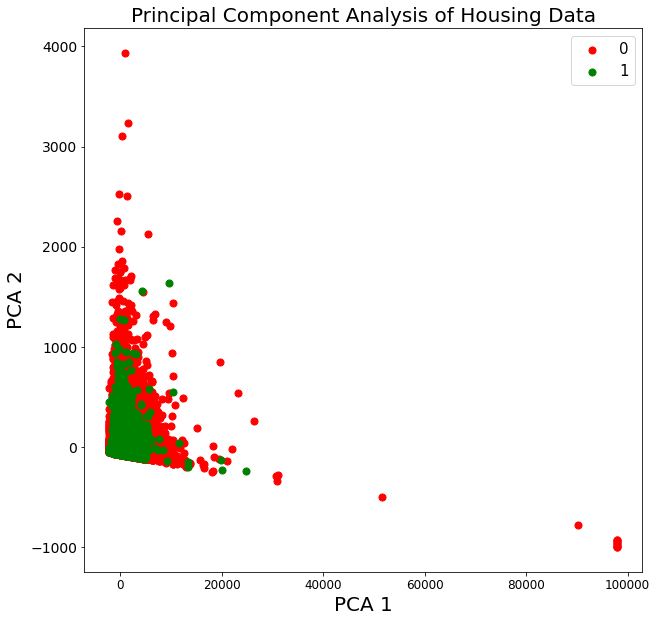

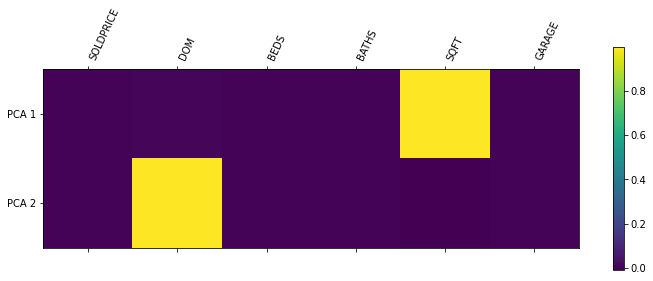

[0.99471545 0.00528455]


In [59]:
# using help from guide here: https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(x)
pca_df = pd.DataFrame(data = pca_fit, columns = ['PCA 1', 'PCA 2'])

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('PCA 1',fontsize=20)
plt.ylabel('PCA 2',fontsize=20)
plt.title("Principal Component Analysis of Housing Data",fontsize=20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df['FLIPPABLE'] == target
    plt.scatter(pca_df.loc[indicesToKeep, 'PCA 1'], 
                pca_df.loc[indicesToKeep, 'PCA 2'], 
                c = color, s = 50)

plt.legend(targets,prop={'size': 15})

# from here: https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1],['PCA 1','PCA 2'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(x_names)),x_names,rotation=65,ha='left')
plt.show()

# explained variance
x_pca=pca.transform(x)
ex_variance=np.var(x_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print (ex_variance_ratio) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3b9409730>,
      dtype=object)

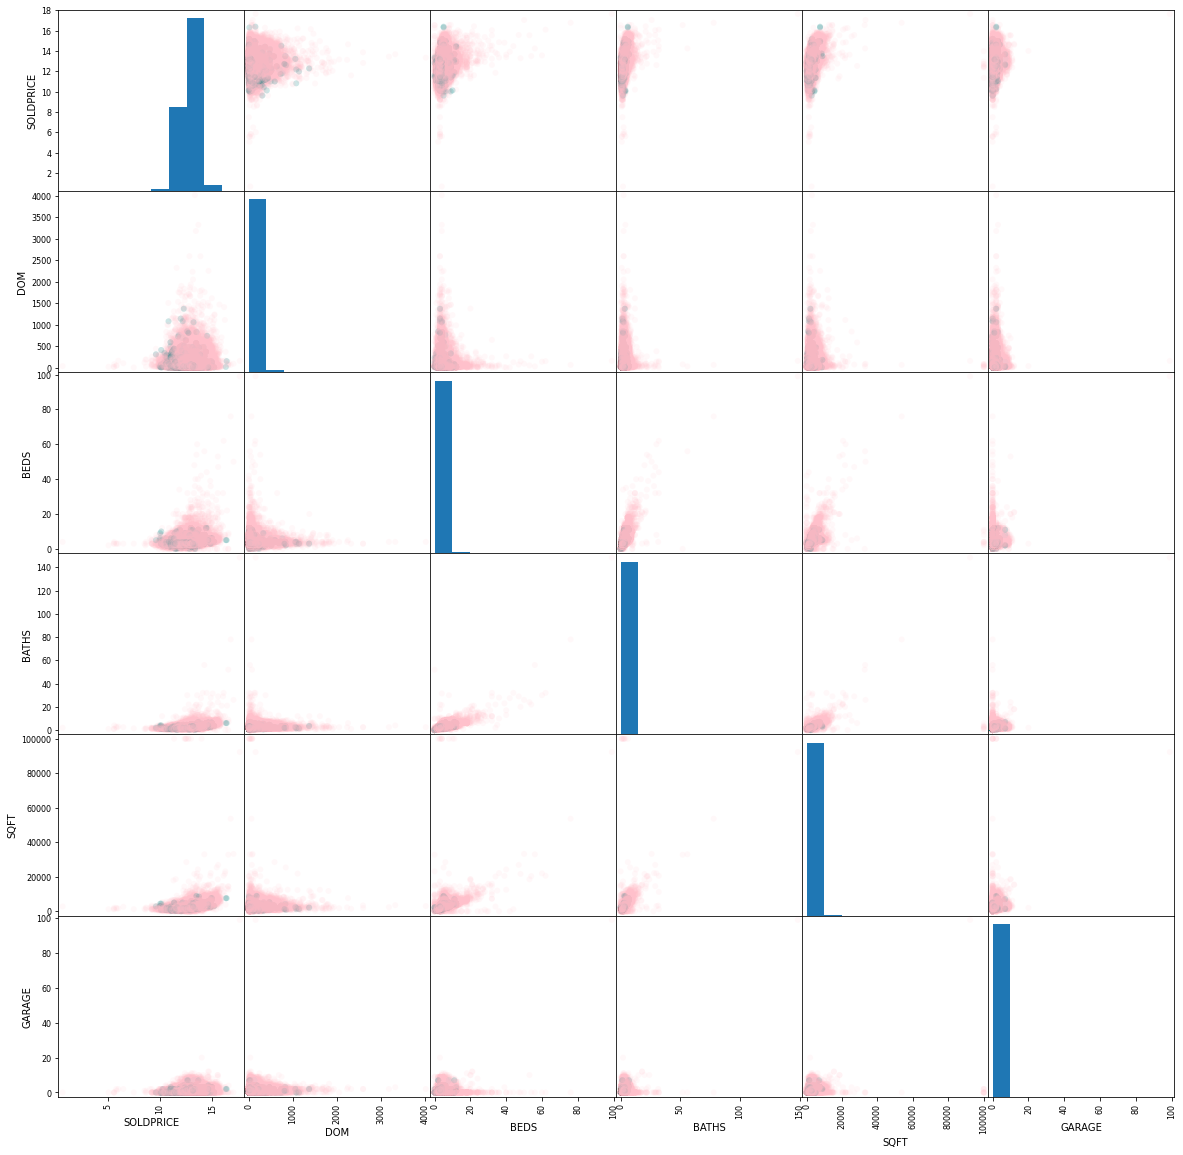

In [60]:
from pandas.plotting import scatter_matrix
%matplotlib inline

#learned this from https://stackoverflow.com/questions/28034424/pandas-scatter-matrix-plot-categorical-variables
colors=['pink','teal']
scatter_matrix(x, figsize=[20,20], marker='o', alpha=0.1, c=df.FLIPPABLE.apply(lambda x:colors[x]))

In [117]:
# Use train/test/split and SMOTE to oversample

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
print(x_train.shape)
print(x_test.shape)

sm = SMOTE(random_state=2)
x_train, y_train = sm.fit_sample(x_train, y_train)


(89361, 7)
(44014, 7)


In [107]:
x_train.head()

,SOLDPRICE,DOM,BATHS,SQFT,AGE,GARAGE
0,2.623209,46,2.0,7.161622,49,2
1,2.652933,6,3.5,7.621195,24,2
2,2.610918,26,1.0,7.550135,78,1
3,2.605810,85,2.0,7.399398,98,1
4,2.613324,14,2.0,7.313887,16,0


# Logistic Regression

In [75]:
# logistic regression w/test train split
from sklearn.linear_model import LogisticRegression

lm = linear_model.LogisticRegression()
lm_fit = lm.fit(x_train, y_train.values.ravel())
y_pred_lm = lm.predict(x_test)

print(classification_report(y_test, y_pred_lm, zero_division=1))

              precision    recall  f1-score   support

       False       0.95      0.60      0.73     41473
        True       0.07      0.52      0.13      2541

    accuracy                           0.59     44014
   macro avg       0.51      0.56      0.43     44014
weighted avg       0.90      0.59      0.70     44014



In [76]:
pd.DataFrame(
    confusion_matrix(y_test, y_pred_lm),
    columns=['Predicted Not Flippable', 'Predicted Flippable'],
    index=['True Not Flippable', 'True Flippable']
)

,Predicted Not Flippable,Predicted Flippable
True Not Flippable,24693,16780
True Flippable,1230,1311


# Decision Tree Classifier

In [77]:
from sklearn.tree import DecisionTreeClassifier

tm = DecisionTreeClassifier()
tm_fit = tm.fit(x_train, y_train)
y_pred_tm = tm.predict(x_test)

print(tm.tree_.max_depth)
print(classification_report(y_test, y_pred_tm, zero_division=1))

41
              precision    recall  f1-score   support

       False       0.98      0.93      0.95     41473
        True       0.37      0.72      0.49      2541

    accuracy                           0.91     44014
   macro avg       0.68      0.82      0.72     44014
weighted avg       0.95      0.91      0.93     44014



In [78]:
pd.DataFrame(
    confusion_matrix(y_test, y_pred_tm),
    columns=['Predicted Not Flippable', 'Predicted Flippable'],
    index=['True Not Flippable', 'True Flippable']
)

,Predicted Not Flippable,Predicted Flippable
True Not Flippable,38405,3068
True Flippable,724,1817


In [60]:
joblib.dump(tm, 'tm_untuned.pkl')

['tm_untuned.pkl']

# LDA and QDA

In [79]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda_fit = lda.fit(x_train, y_train.values.ravel())

print(lda_fit.priors_) # prior possibilities of either outcome
print(lda_fit.means_)
print(lda_fit.coef_)

y_pred_lda=lda_fit.predict(x_test)
print(np.unique(y_pred_lda, return_counts=True))
print(classification_report(y_test, y_pred_lda, zero_division=1))

[0.5 0.5]
[[1.28235308e+01 7.25893319e+01 3.67537889e+00 2.16793160e+00
  2.14540807e+03 1.07492351e+00]
 [1.25523734e+01 6.18253801e+01 3.19423428e+00 1.86109860e+00
  1.79638968e+03 5.56981239e-01]]
[[-5.61473688e-01 -1.29357568e-03 -3.29393601e-01  2.90414307e-01
   1.06437212e-04 -5.54958632e-01]]
(array([False,  True]), array([25822, 18192]))
              precision    recall  f1-score   support

       False       0.96      0.60      0.73     41473
        True       0.08      0.56      0.14      2541

    accuracy                           0.59     44014
   macro avg       0.52      0.58      0.44     44014
weighted avg       0.91      0.59      0.70     44014



In [80]:
pd.DataFrame(
    confusion_matrix(y_test, y_pred_lda),
    columns=['Predicted Not Flippable', 'Predicted Flippable'],
    index=['True Not Flippable', 'True Flippable']
)

,Predicted Not Flippable,Predicted Flippable
True Not Flippable,24710,16763
True Flippable,1112,1429


In [81]:
qda = QuadraticDiscriminantAnalysis()
qda_fit = qda.fit(x_train, y_train.values.ravel())

print(qda_fit.priors_) # prior possibilities of either outcome
print(qda_fit.means_)

y_pred_qda=qda_fit.predict(x_test)
print(np.unique(y_pred_qda, return_counts=True))
print(classification_report(y_test, y_pred_qda, zero_division=1))

[0.5 0.5]
[[1.28235308e+01 7.25893319e+01 3.67537889e+00 2.16793160e+00
  2.14540807e+03 1.07492351e+00]
 [1.25523734e+01 6.18253801e+01 3.19423428e+00 1.86109860e+00
  1.79638968e+03 5.56981239e-01]]
(array([False,  True]), array([13334, 30680]))
              precision    recall  f1-score   support

       False       0.96      0.31      0.47     41473
        True       0.07      0.79      0.12      2541

    accuracy                           0.34     44014
   macro avg       0.51      0.55      0.29     44014
weighted avg       0.91      0.34      0.45     44014



In [82]:
pd.DataFrame(
    confusion_matrix(y_test, y_pred_qda),
    columns=['Predicted Not Flippable', 'Predicted Flippable'],
    index=['True Not Flippable', 'True Flippable']
)

,Predicted Not Flippable,Predicted Flippable
True Not Flippable,12803,28670
True Flippable,531,2010


# KNN

In [103]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn_fit = knn.fit(x_train, y_train.values.ravel())

y_pred_knn = knn.predict(x_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

       False       0.98      0.81      0.89     41473
        True       0.19      0.74      0.30      2541

    accuracy                           0.80     44014
   macro avg       0.59      0.77      0.59     44014
weighted avg       0.93      0.80      0.85     44014



In [104]:
pd.DataFrame(
    confusion_matrix(y_test, y_pred_knn),
    columns=['Predicted Not Flippable', 'Predicted Flippable'],
    index=['True Not Flippable', 'True Flippable']
)

,Predicted Not Flippable,Predicted Flippable
True Not Flippable,33489,7984
True Flippable,663,1878


Text(0, 0.5, 'Error')

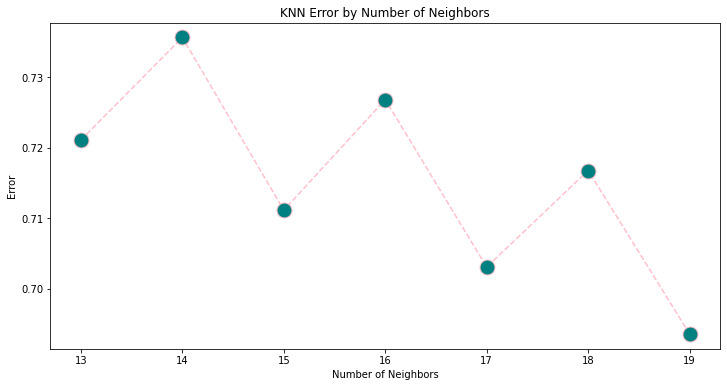

In [92]:
from sklearn.metrics import zero_one_loss

error = []
for i in range(1, 7):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train.values.ravel())
    pred_i = knn.predict(x_test)
    accuracy = zero_one_loss(y_test, pred_i)
    error.append(1 - accuracy)
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 7), error, color='pink', linestyle='dashed', marker='o',
         markerfacecolor='teal', markersize=15)
plt.title('KNN Error by Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Error')

# Support Vector Machine

In [ ]:
# Parameter tuning needs to be done not on a laptop, it takes forever. 

# I've commented out all the gridsearch code and will tune the models later
# For this and ensemble methods I found this helpful: 
# https://www.datasklr.com/select-classification-methods/support-vector-machines

# from sklearn.model_selection import GridSearchCV

# for gridsearch I want to split our data a bit more:
# df1, df2, df3 = np.split(df.sample(frac=1), [int(.33*len(df)), int(.7*len(df))])

# print(df1.shape)
# print(df2.shape)
# print(df3.shape)

# y_1 = df1[y_names]
# x_1 = df1[x_names]
# y_2 = df2[y_names]
# x_2 = df2[x_names]
# y_3 = df3[y_names]
# x_3 = df3[x_names]

# x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1, y_1, test_size=0.33)
# x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2, y_2, test_size=0.33)
# x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x_3, y_3, test_size=0.33)

In [130]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

svc = SVC()
svc.fit(x_train, y_train.values.ravel())
y_pred_svc = svc.predict(x_test)
print(classification_report(y_test, y_pred_svc, zero_division=1))

KeyboardInterrupt: 

In [ ]:
pd.DataFrame(
    confusion_matrix(y_test, y_pred_svc),
    columns=['Predicted Not Flippable', 'Predicted Flippable'],
    index=['True Not Flippable', 'True Flippable']
)

In [14]:
# estimator_SVM = SVC(gamma='scale')
# parameters_SVM = {
#     'C': (0.1, 15.0, 0.1),
#     'kernel': ('linear', 'poly', 'rbf', 'sigmoid'),
#     'coef0': (0.0, 10.0, 1.0),
#     'shrinking': (True, False),
# }

# # with GridSearch
# grid_search_SVM = GridSearchCV(
#     estimator=estimator_SVM,
#     param_grid=parameters_SVM,
#     scoring = 'accuracy',
#     n_jobs = -1,
#     cv = 5
# )

# SVM_1 = grid_search_SVM.fit(x_train_1, y_train_1.values.ravel())
# y_pred_SVM1 = SVM_1.predict(x_test_1)
# SVM_2 = grid_search_SVM.fit(x_train_2, y_train_2.values.ravel())
# y_pred_SVM2 = SVM_2.predict(x_test_2)
# SVM_3 = grid_search_SVM.fit(x_train_3, y_train_3.values.ravel())
# y_pred_SVM3 = SVM_3.predict(x_test_3)

# print(grid_search_SVM.best_params_)

# print('Accuracy Score - SVM - Default:', metrics.accuracy_score(y_test, y_pred_svc))  
# print('Accuracy Score - SVM - Poly = 1:', metrics.accuracy_score(y_test_1, y_pred_SVM1)) 
# print('Accuracy Score - SVM - Poly = 2:', metrics.accuracy_score(y_test_2, y_pred_SVM2)) 
# print('Accuracy Score - SVM - Poly = 3:', metrics.accuracy_score(y_test_3, y_pred_SVM3)) 

# Ensemble (Bagging, Boosting, Random Forest)

No parameter tuning on these either - this will check the vanilla models and later we can tune the ones that do well.

## Random Forest

In [146]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=50, n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features='auto', max_depth=40, bootstrap='False')
rf_fit = rf.fit(x_train, y_train.values.ravel())
y_pred_rf = rf.predict(x_test)
print(classification_report(y_test, y_pred_rf, zero_division=1))

              precision    recall  f1-score   support

       False       0.98      0.98      0.98     41573
        True       0.64      0.70      0.67      2441

    accuracy                           0.96     44014
   macro avg       0.81      0.84      0.82     44014
weighted avg       0.96      0.96      0.96     44014



In [147]:
pd.DataFrame(
    confusion_matrix(y_test, y_pred_rf),
    columns=['Predicted Not Flippable', 'Predicted Flippable'],
    index=['True Not Flippable', 'True Flippable']
)

,Predicted Not Flippable,Predicted Flippable
True Not Flippable,40625,948
True Flippable,742,1699


In [143]:
# from sklearn.model_selection import RandomizedSearchCV

# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}

# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# print("working...")
# # Fit the random search model
# rf_random.fit(x_train, y_train)
# print("working...")

working...
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 82.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 190.4min finished
/opt/anaconda3/envs/mylabenv/lib/python3.8/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


working...


In [144]:
# rf_random.best_params_

{'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 40, 'bootstrap': False}

In [150]:
joblib.dump(rf, 'rf_tuned.pkl')

['rf_tuned.pkl']

## Boosting

In [93]:
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier()
GB_fit = GB.fit(x_train, y_train.values.ravel())
y_pred_GB = GB.predict(x_test)
print(classification_report(y_test, y_pred_GB, zero_division=1))

              precision    recall  f1-score   support

       False       0.95      0.91      0.93     41473
        True       0.11      0.18      0.14      2541

    accuracy                           0.87     44014
   macro avg       0.53      0.55      0.54     44014
weighted avg       0.90      0.87      0.89     44014



In [94]:
pd.DataFrame(
    confusion_matrix(y_test, y_pred_GB),
    columns=['Predicted Not Flippable', 'Predicted Flippable'],
    index=['True Not Flippable', 'True Flippable']
)

,Predicted Not Flippable,Predicted Flippable
True Not Flippable,37936,3537
True Flippable,2085,456


In [95]:
from sklearn.ensemble import AdaBoostClassifier

ADB = AdaBoostClassifier()
ADB_fit = ADB.fit(x_train, y_train.values.ravel())
y_pred_ADB = ADB.predict(x_test)

print(classification_report(y_test, y_pred_ADB, zero_division=1))

              precision    recall  f1-score   support

       False       0.95      0.83      0.89     41473
        True       0.09      0.28      0.14      2541

    accuracy                           0.80     44014
   macro avg       0.52      0.55      0.51     44014
weighted avg       0.90      0.80      0.84     44014



In [96]:
pd.DataFrame(
    confusion_matrix(y_test, y_pred_ADB),
    columns=['Predicted Not Flippable', 'Predicted Flippable'],
    index=['True Not Flippable', 'True Flippable']
)

,Predicted Not Flippable,Predicted Flippable
True Not Flippable,34397,7076
True Flippable,1832,709


In [97]:
from xgboost import XGBClassifier

XGB = XGBClassifier()
XGB_fit = XGB.fit(x_train, y_train.values.ravel())
y_pred_XGB = XGB.predict(x_test)
print(classification_report(y_test, y_pred_XGB, zero_division=1))

              precision    recall  f1-score   support

       False       0.95      0.92      0.94     41473
        True       0.14      0.20      0.17      2541

    accuracy                           0.88     44014
   macro avg       0.55      0.56      0.55     44014
weighted avg       0.90      0.88      0.89     44014



In [98]:
pd.DataFrame(
    confusion_matrix(y_test, y_pred_XGB),
    columns=['Predicted Not Flippable', 'Predicted Flippable'],
    index=['True Not Flippable', 'True Flippable']
)

,Predicted Not Flippable,Predicted Flippable
True Not Flippable,38285,3188
True Flippable,2021,520


## Bagging

In [99]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier()
bag_fit = bag.fit(x_train, y_train.values.ravel())
y_pred_bag = bag.predict(x_test)
print(classification_report(y_test, y_pred_bag, zero_division=1))

              precision    recall  f1-score   support

       False       0.98      0.97      0.97     41473
        True       0.53      0.62      0.57      2541

    accuracy                           0.95     44014
   macro avg       0.75      0.79      0.77     44014
weighted avg       0.95      0.95      0.95     44014



In [100]:
pd.DataFrame(
    confusion_matrix(y_test, y_pred_bag),
    columns=['Predicted Not Flippable', 'Predicted Flippable'],
    index=['True Not Flippable', 'True Flippable']
)

,Predicted Not Flippable,Predicted Flippable
True Not Flippable,40086,1387
True Flippable,960,1581
